In [1]:
import csv
from numpy import genfromtxt

In [2]:
with open('forest-cover-type-prediction/train.csv', 'rt') as f:
    reader = csv.reader(f)
    header = next(reader)

In [3]:
my_data = genfromtxt('forest-cover-type-prediction/train.csv', delimiter=',')

In [9]:
train_data = my_data[1:, :my_data.shape[1]-1]
train_labels = my_data[1:,-1]

In [11]:
print(train_data.shape)
print(train_labels.shape)

(15120, 55)
(15120,)


In [76]:
def generate_cor_graph(data, size=(15,15), title = None):
    
    corr = data.corr()
    fig = plt.figure(figsize = size)
    ax = fig.add_subplot(111)
    cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0,len(data.columns),1)
    ax.set_xticks(ticks)
    plt.xticks(rotation=90)
    ax.set_yticks(ticks)
    ax.set_xticklabels(data.columns)
    ax.set_yticklabels(data.columns)
    plt.tight_layout()
    plt.title(title, y=1.2)
    plt.show()

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('forest-cover-type-prediction/train.csv')

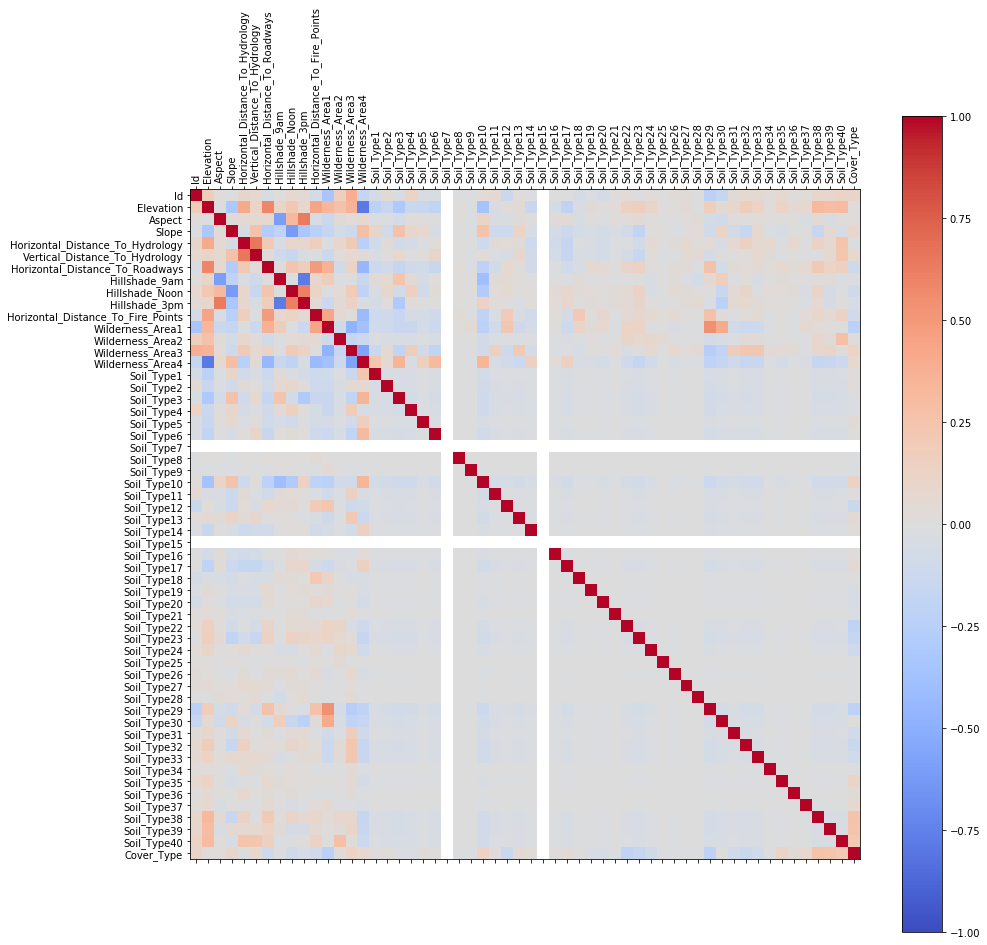

In [64]:
generate_cor_graph(df)

[-1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


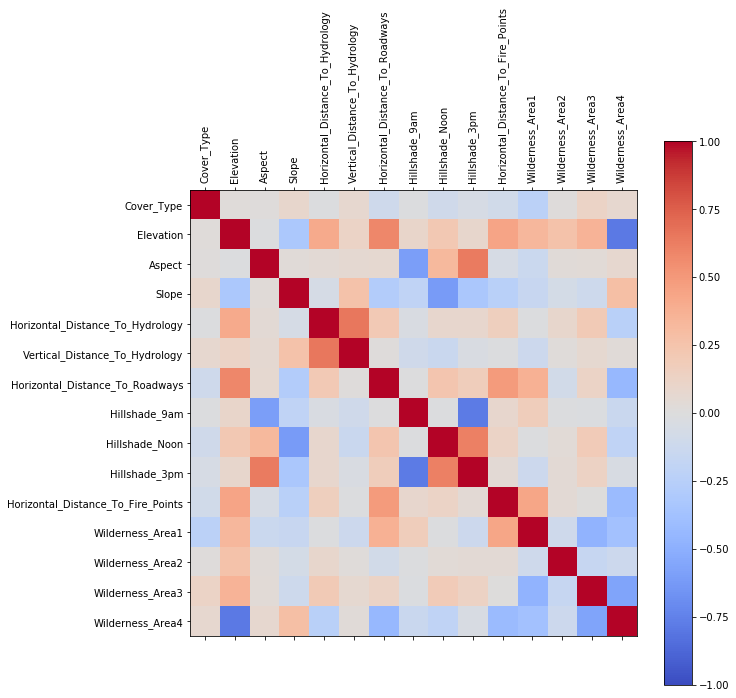

In [46]:
cols = [i for i in range(1,15)]
cols = [-1] + cols
data_soil_id_exclu = df.iloc[:,cols]
generate_cor_graph(data_soil_id_exclu, (10,10))

In [ ]:
data_soil_id_exclu.describe()

In [ ]:
df.iloc[:, 15:].describe()

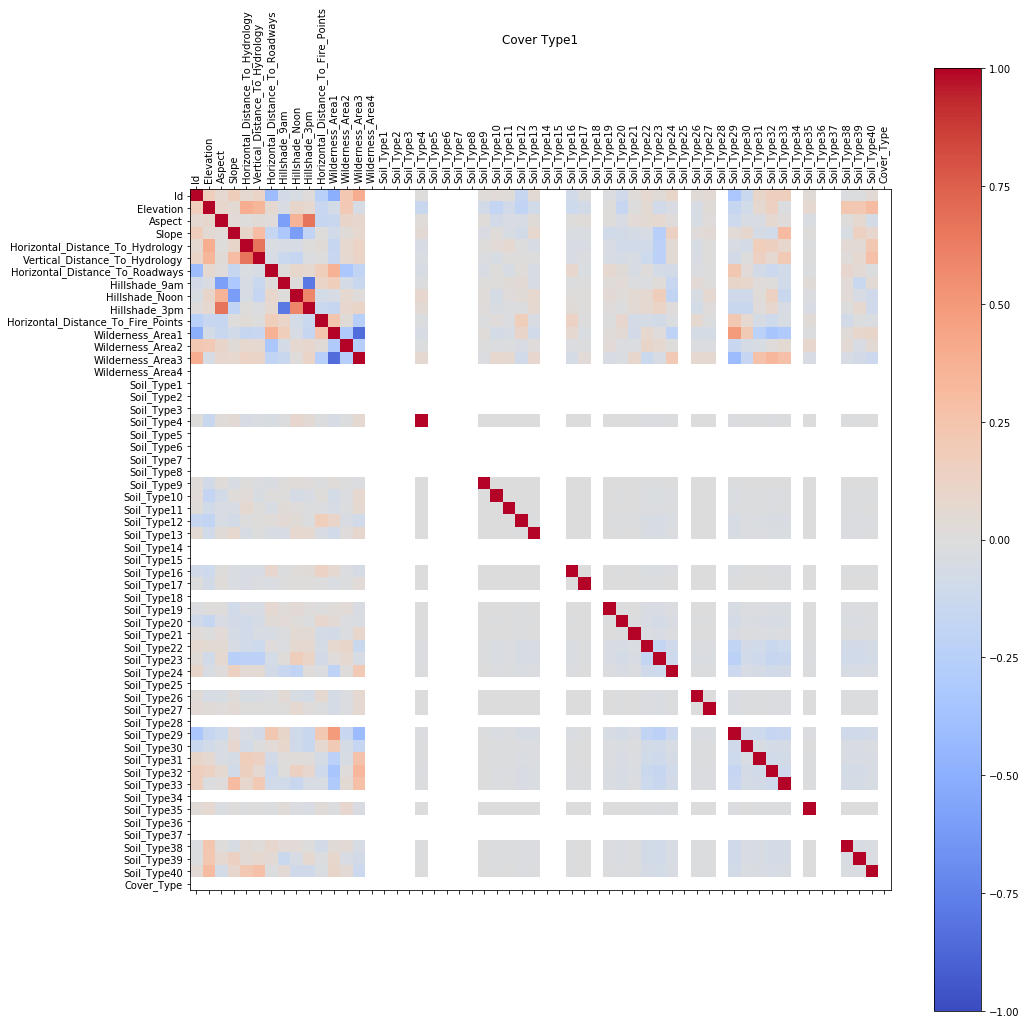

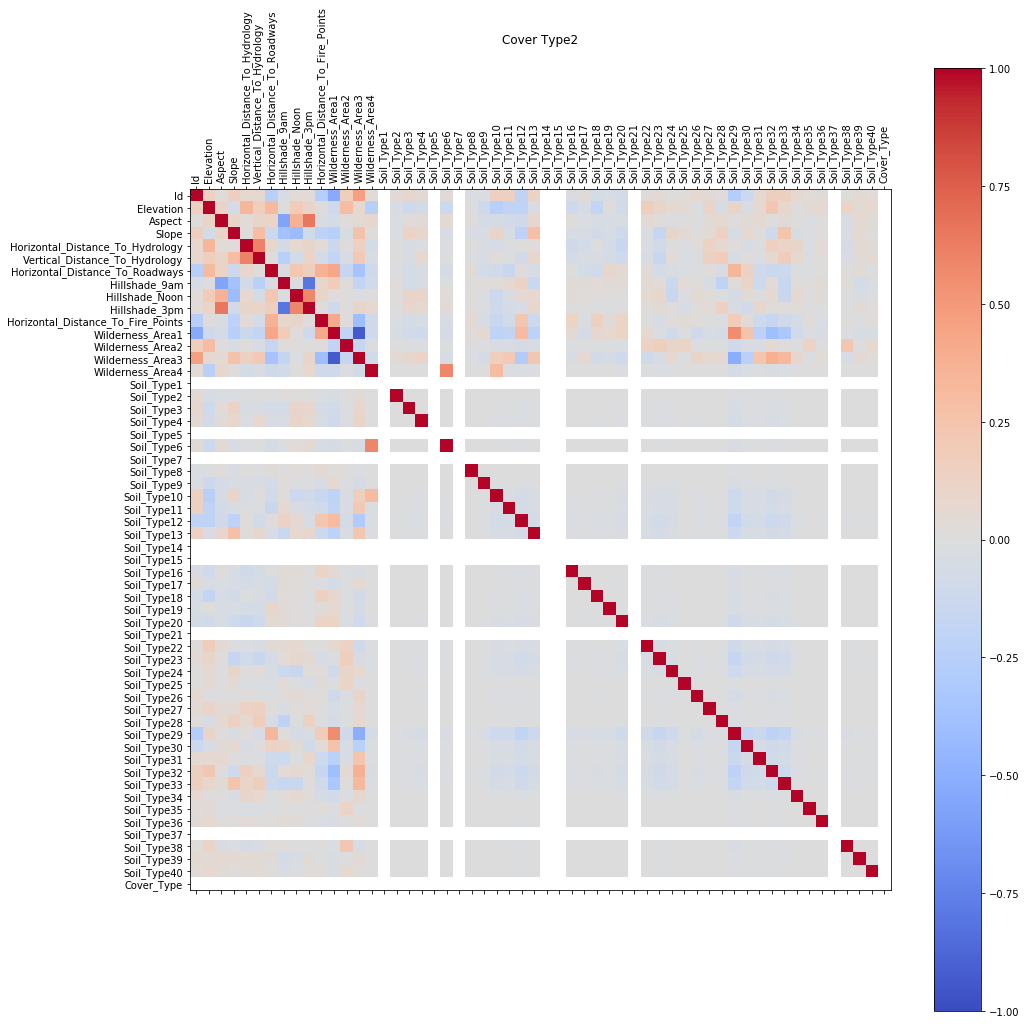

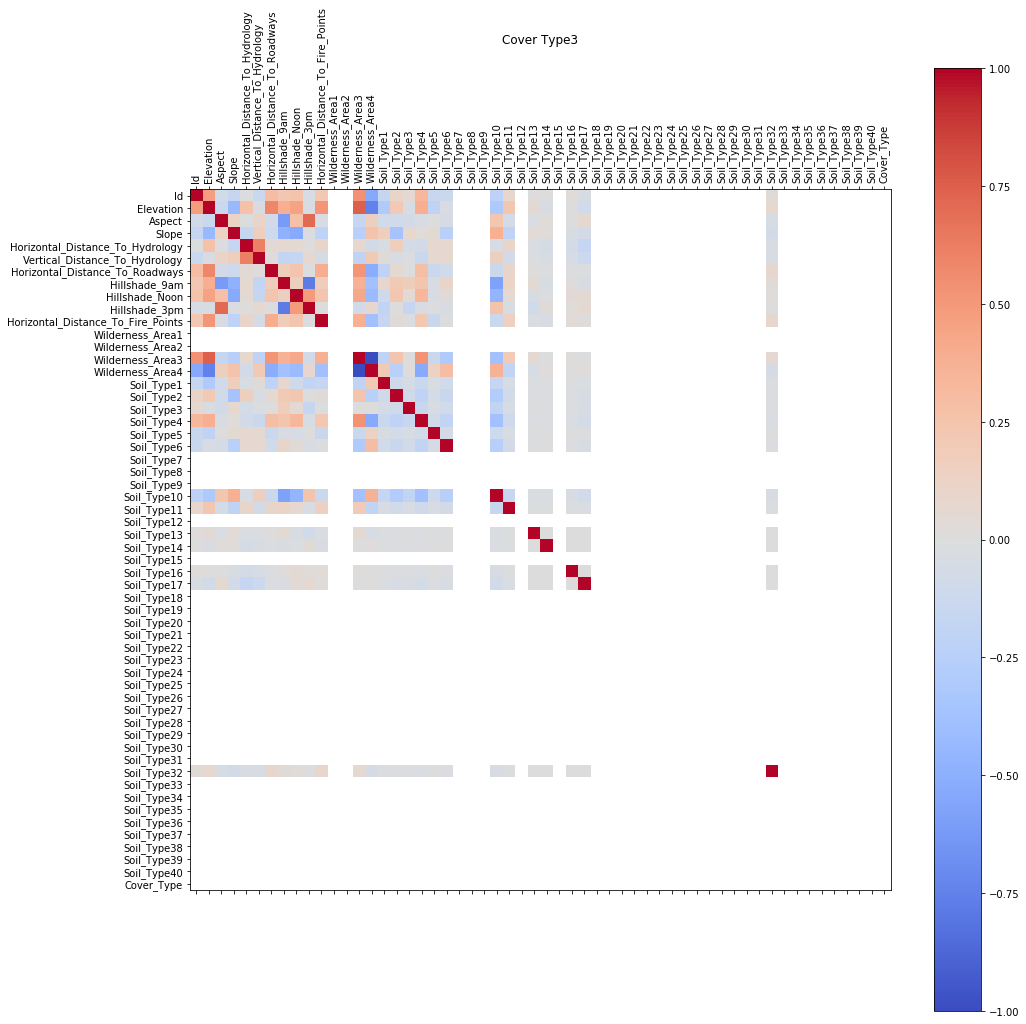

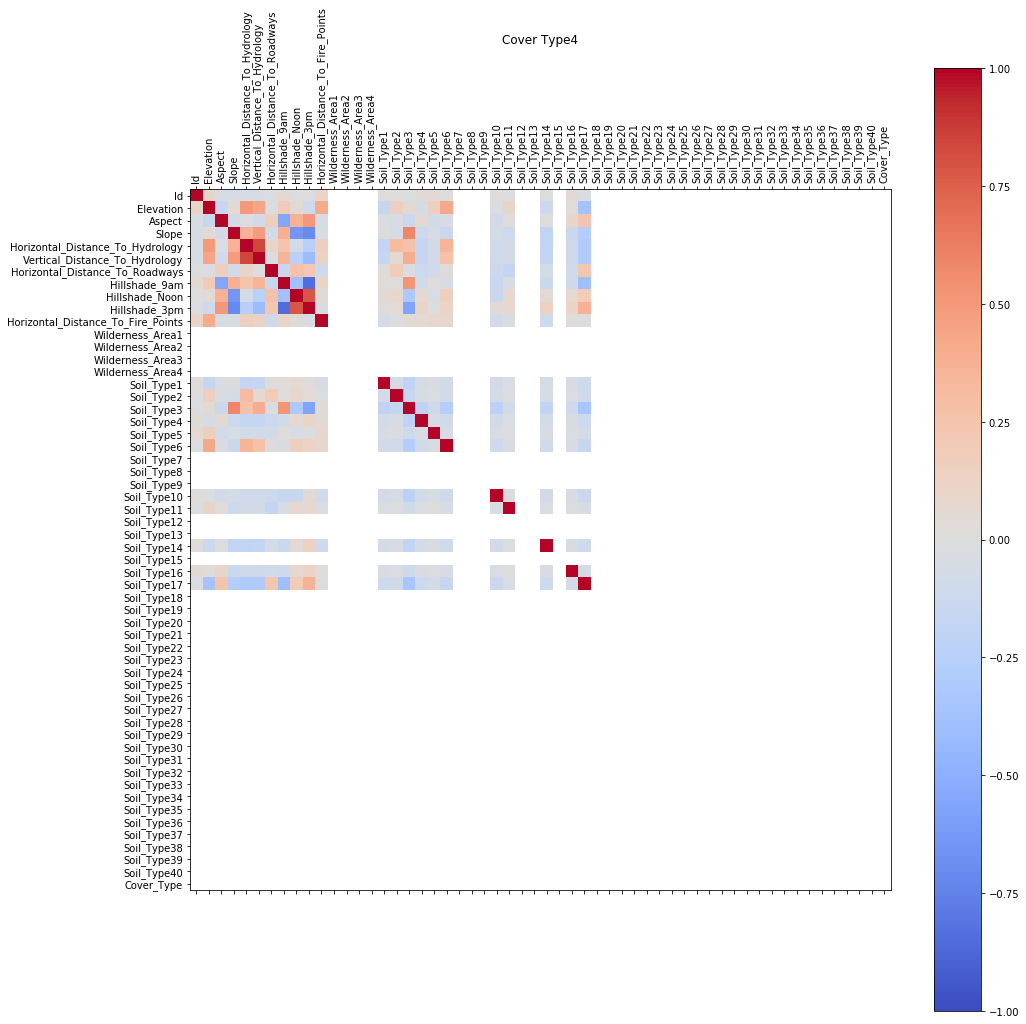

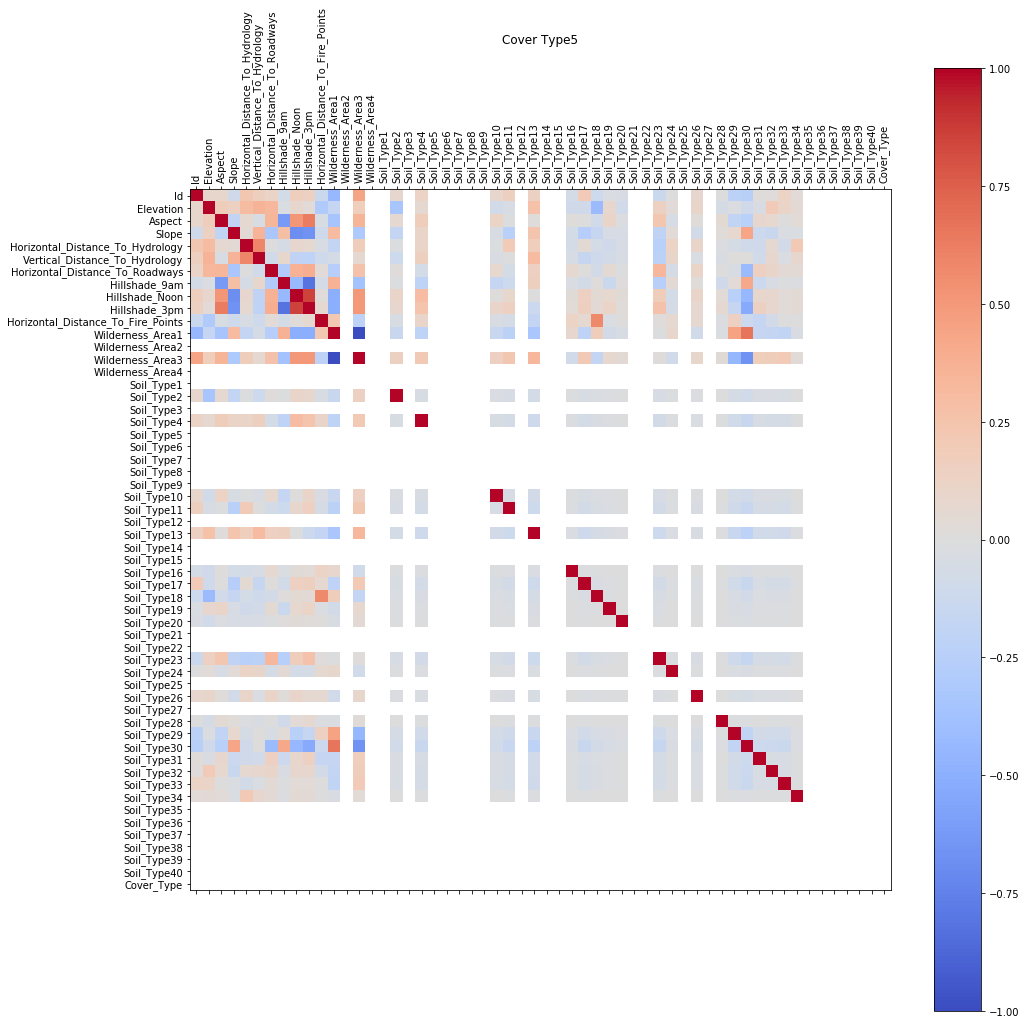

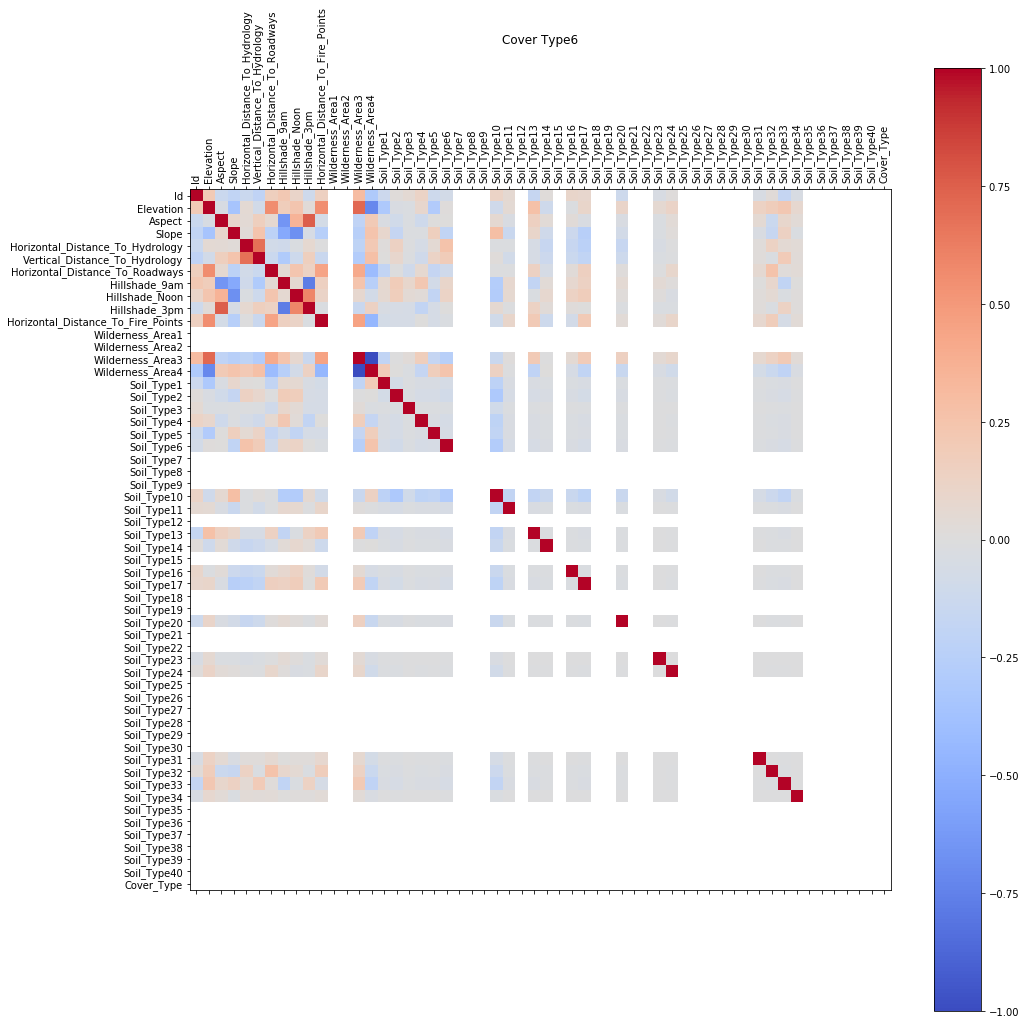

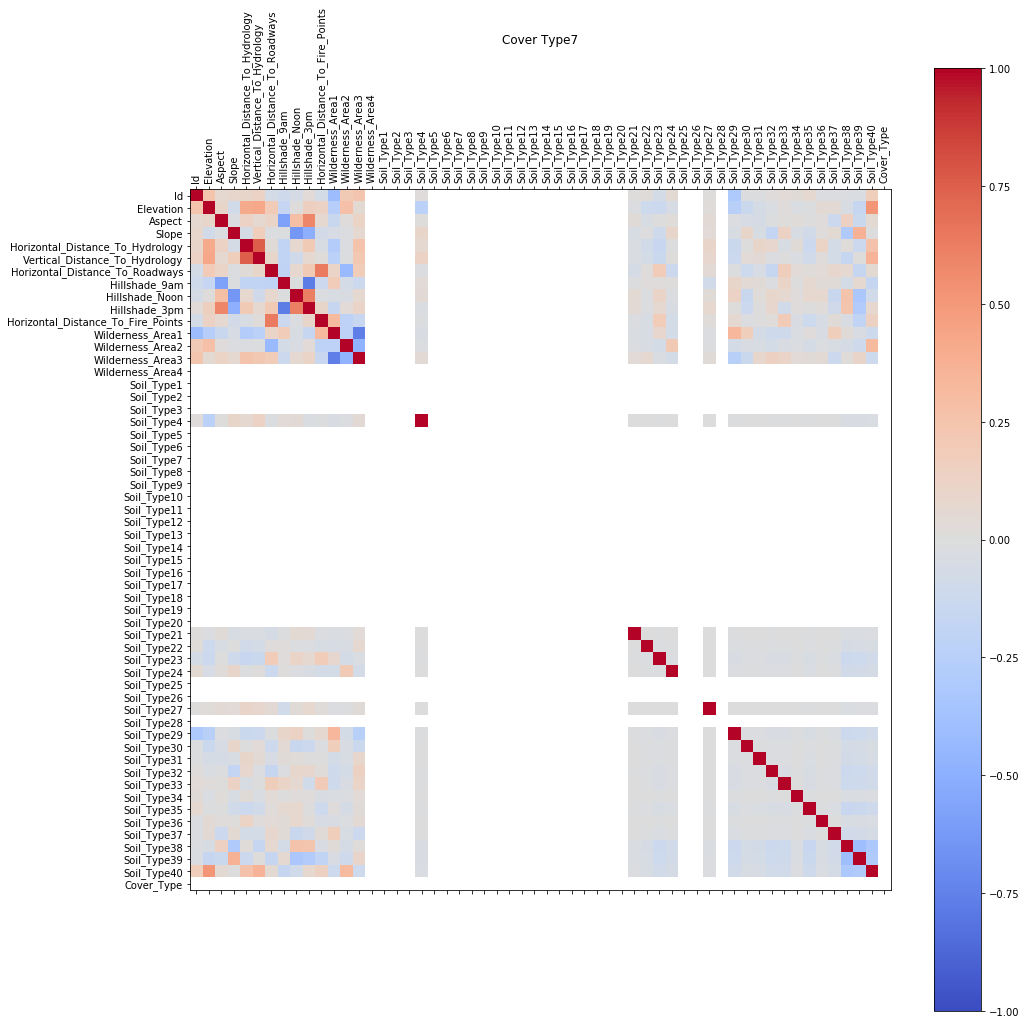

In [77]:
cover_types = np.sort(df.iloc[:, -1].unique())
df_dict = {}

for cover_type in cover_types:
    df_dict[cover_type] = df.loc[df['Cover_Type'] == cover_type]

for cover_type in cover_types:
    generate_cor_graph(data = df_dict[cover_type], title = 'Cover Type' + str(cover_type))

## Findings:

### General
* The most direct correlations with cover type come from some soil type
* we have all zero for soil type 7 and 15, smoothing is required for NB if we want to keep the features
* Make sure ID is not used in training 
* The feature space is not sparse because it's mostly binary data and there's only 55 features
* Use cross-validation to optimize hyper-parameter
* The mean of soil_type features are all significantly below 0.5. Mostly below 0.1. Therefore, this means most cover_types have many soil_type = 0. We can try summing the soil_type features and maybe some pattern will emerge (some cover type are corresponding to diverse soil types and that's a good supplement feature to use)

#### KNN
* we will need to standardize the features if we want to make the features roughly contributes equally to the predictions

#### Naive Bayes
* we will need to binarize the dataset to use bernoulliNB since more than half of our variables are binary
* Conditional Independence:
    * We see that after conditioning on a specific cover type, the correlation increases especially when the features besides cover-types are involved. We need to take out the strongly correlated features before training

#### Decision Tree
* Make sure ID is not used in training
* Watch out for over fitting

#### Logistic Regression
* use one vs all
* some regularization

#### Neural Nets

## Questions

1. Can we use different sets of features for different models